# 카메라 스티커앱 만들기

## 학습 목표
1. 얼굴인식 카메라의 흐름 이해
1. dlib 라이브러리 사용
1. 이미지 배열의 인덱싱 예외 처리

## 사진 준비하기

In [1]:
import os    #os에 갖춰진 기본적인 기능 사용
import cv2    #컴퓨터 비전 2 for 이미지 처리
import matplotlib.pyplot as plt    #이미지 출력
import numpy as np
import dlib    #이번 노드 핵심 import

In [2]:
my_image_path = os.getenv('HOME')+"/aiffel/camera_sticker/images/myimage.png"
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()

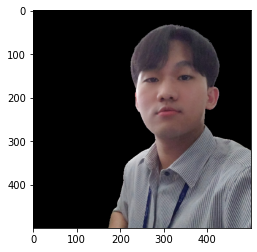

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(221, 98) (407, 284)]]


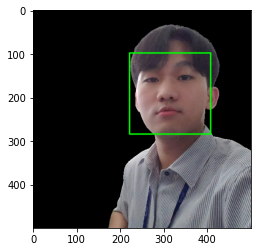

In [6]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    #dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수
    l = dlib_rect.left()    #왼쪽
    t = dlib_rect.top()    #위
    r = dlib_rect.right()    #오른쪽
    b = dlib_rect.bottom()    #밑
    
    cv2.rectangle(img_show, (l,t),(r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


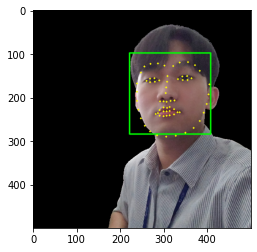

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용하기

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    
    x = landmark[8][0]
    y = landmark[8][1] - dlib_rect.height()//1024
    w = h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(305, 290)
(x,y) : (305,290)
(w,h) : (187,187)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catnose.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)

(187, 187, 3)


In [12]:
refined_x = x - w // 2
refined_y = y - h

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (212,103)


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0 
    
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (212,103)


In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

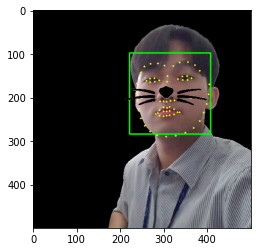

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

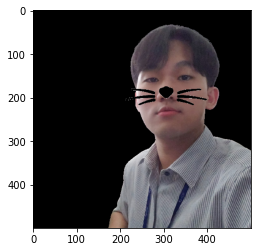

In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 반대편 사진

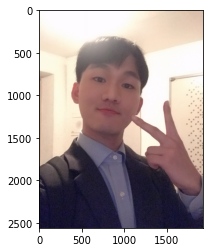

In [17]:
my_image_path = os.getenv('HOME')+"/aiffel/camera_sticker/images/suit.png"

img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [18]:
detector_hog = dlib.get_frontal_face_detector()

In [19]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

In [20]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()    
    t = dlib_rect.top()   
    r = dlib_rect.right()   
    b = dlib_rect.bottom()  
    
    cv2.rectangle(img_show, (l,t),(r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

rectangles[[(425, 603) (1224, 1402)]]


In [21]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [22]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


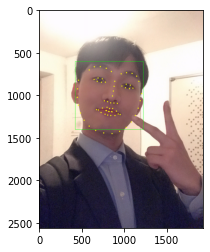

In [23]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 7, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [24]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[9])
    
    x = landmark[9][0]
    y = landmark[9][1] - dlib_rect.height()//1024
    w = h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(857, 1451)
(x,y) : (857,1451)
(w,h) : (800,800)


In [25]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catnose.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)

(800, 800, 3)


In [26]:
refined_x = x - w // 2
refined_y = y - h

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (457,651)


In [27]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:] 
    refined_x = 0  
    
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (457,651)


In [28]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

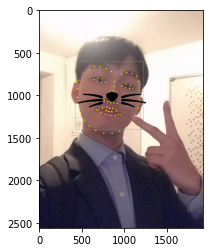

In [29]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

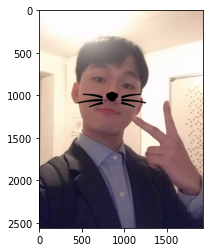

In [30]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

 총 두장의 좌우가 다른 얼굴 사진에 검정색 스티커를 붙혔습니다.
 
 이번 Exploration에서 약간의 신선한 충격이 있었습니다. 모르는게 많은 입문자라서 그런지 그동안 이러한 합성 기술이 포토샵의 영역인 줄 알았습니다. 그 이유는 제가 대외활동들을 하면서 영상 및 사진 편집 담당을 많이 맡았었는데, 이때 조금이나마 합성을 안다고 생각했기 때문입니다. 하지만, 이번을 계기로 프로그래밍을 통해서도 할 수 있다는 사실을 알게 되었습니다. 시실 이번에는 이 부분이 코딩에서 배운 것보다 저에게 더 큰 추격을 줬습니다.
 
 지금부터는 이번 목표 카메라 스티커앱 만들기에서 새롭게 알게된 것들에 대해서 적고자 합니다. 우선, 얼굴각도, 이미지 밝기와 촬영거리 등 다양한 변수에 따른 영향도을 알아보고자 했습니다. 이에 하나의 배경을 검정색으로 하였고, 다른 하나는 평범하게 밝은 노란 느낌으로 하였습니다. 두 사진 모두다 얼굴 인식을 잘하였습니다.
 
 하지만, 처음부터 잘 된 것은 아니었습니다. 첫 번째 난관은 고양이 스티커의 수염인 검정색이 나오는 것이 아니라 사진 배경인 흰색만 나왔었습니다. 이 문제를 해결하고자 RBG에서는 색표현을 0~2^8까지 있다는 것을 공부했습니다. 이에 흰색만 노출시키는 0 대신 255를 "img_sticker==255 "를 사용하여 검정색만 노출되게 만들어 해결해냈습니다. 다음으로 두 번째에는 얼굴 인식 시 point가 안보이는 어려움을 겪었습니다. 사진의 컬러감마다 노란색이 안보일 수 있다는 사실을 알았고, point의 크기 "cv2.circle(img_show, point, 7, (0, 255, 255), -1)" 를 조정해 눈으로 보기 편안하게 만들었습니다. 

 평소 SNOW라는 카메라 어플을 한 번씩 사용하는데 항상 신기해 했던 기억이 있습니다. 첫 걸음이긴 하지만, 조금이나마 이해함으로써 작게는 저만의 스티커를 만들어 보고 싶다는 생각이 들었습니다. 나아가 크게는 스티커뿐만 아니라 CV를 활용해서 이미지에 맞는 스티커까지 추천하는 앱을 만들어보고 싶습니다.
 
 다음에는 어떤 또다른 경험을 할지 기대가 됩니다!